In [1]:
import pandas as pd
import numpy as np
import os
import dill as pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

In [2]:
def load_sentence_embeddings(model='DistilBERT', features_path='features/', filename='sentence_embeddings'):
    if model == 'DistilBERT':
        tst_df = pd.concat([pickle.load(open(os.path.join(features_path, file), 'rb')) for file in os.listdir(features_path) if filename in file])
        return tst_df

In [3]:
tst_df = load_sentence_embeddings()

In [4]:
tst_df.shape

(22332, 2)

In [5]:
tst_df.head()

,sentence_embeddings,label
0,"[-0.21086546778678894, -0.005486507900059223, ...",0
1,"[-0.3340323865413666, 0.1280461549758911, -0.6...",0
2,"[-0.4694300889968872, -0.14065003395080566, -0...",0
3,"[-0.19011789560317993, 0.16007745265960693, -0...",0
4,"[-0.5151359438896179, -0.09672432392835617, -0...",0


In [6]:
tst_df.label.value_counts()

0    14888
1     7444
Name: label, dtype: int64

In [7]:
features = np.array(tst_df.sentence_embeddings.tolist())

In [8]:
labels = tst_df['label']

In [9]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [17]:
clf1 = MLPClassifier(random_state=1, max_iter=300).fit(train_features, train_labels)

In [18]:
predictions = clf1.predict(test_features)
probs = clf1.predict_proba(test_features)[:, 1]

In [19]:
clf1.score(test_features, test_labels)

0.9860290166577109

In [20]:
result_table = [["Classifier", "F1", "Accuracy", "AUC"]]

In [21]:
result_table.append([
    "MLPClassifier(random_state=1, max_iter=300)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

In [22]:
result_table

[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999]]

# increased layers

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', 
                    shuffle=True, early_stopping=True, random_state=1, max_iter=500).fit(train_features, train_labels)

In [12]:
predictions = clf.predict(test_features)
probs = clf.predict_proba(test_features)[:, 1]

In [13]:
clf.score(test_features, test_labels)

0.9817302525523912

In [14]:
result_table = [["Classifier", "F1", "Accuracy", "AUC"]]

In [23]:
result_table.append([
    "MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

In [24]:
result_table

[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.979,
  0.986,
  0.999]]

In [26]:
clf2 = MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', 
                    shuffle=True, early_stopping=True, random_state=1, max_iter=500).fit(train_features, train_labels)

predictions = clf2.predict(test_features)
probs = clf2.predict_proba(test_features)[:, 1]

print(clf2.score(test_features, test_labels))

result_table.append([
    "MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

result_table

0.9817302525523912


[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.979,
  0.986,
  0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998]]

In [28]:
clf3 = MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='constant', 
                    shuffle=True, early_stopping=True, random_state=1, max_iter=500).fit(train_features, train_labels)

predictions = clf3.predict(test_features)
probs = clf3.predict_proba(test_features)[:, 1]

print(clf3.score(test_features, test_labels))

result_table.append([
    "MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

result_table

0.9815511373813361


[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.979,
  0.986,
  0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998]]

In [29]:
clf4 = MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='adaptive', 
                    shuffle=True, early_stopping=True, random_state=1, max_iter=500).fit(train_features, train_labels)

predictions = clf4.predict(test_features)
probs = clf4.predict_proba(test_features)[:, 1]

print(clf4.score(test_features, test_labels))

result_table.append([
    "MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

result_table

0.9815511373813361


[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.979,
  0.986,
  0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998]]

In [30]:
pd.DataFrame(result_table)

,0,1,2,3
0,Classifier,F1,Accuracy,AUC
1,"MLPClassifier(random_state=1, max_iter=300)",0.979,0.986,0.999
2,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.979,0.986,0.999
3,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.973,0.982,0.998
4,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.973,0.982,0.998
5,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.973,0.982,0.998


In [33]:
clf5 = MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='relu', learning_rate='adaptive', 
                    shuffle=True, early_stopping=True, random_state=1, max_iter=500).fit(train_features, train_labels)

predictions = clf5.predict(test_features)
probs = clf5.predict_proba(test_features)[:, 1]

print(clf5.score(test_features, test_labels))

result_table.append([
    "MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='relu', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

result_table

0.985312555973491


[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.979,
  0.986,
  0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='relu', learning_rate='adaptive', shu

In [34]:
clf6 = MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='relu', learning_rate='constant', 
                    shuffle=True, early_stopping=True, random_state=1, max_iter=500).fit(train_features, train_labels)

predictions = clf6.predict(test_features)
probs = clf6.predict_proba(test_features)[:, 1]

print(clf6.score(test_features, test_labels))

result_table.append([
    "MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='relu', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

result_table

0.985312555973491


[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.979,
  0.986,
  0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='relu', learning_rate='adaptive', shu

In [35]:
clf7 = MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='logistic', learning_rate='constant', 
                    shuffle=True, early_stopping=True, random_state=1, max_iter=500).fit(train_features, train_labels)

predictions = clf7.predict(test_features)
probs = clf7.predict_proba(test_features)[:, 1]

print(clf7.score(test_features, test_labels))

result_table.append([
    "MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
    round(f1_score(test_labels, predictions), 3),
    round(accuracy_score(test_labels, predictions), 3),
    round(roc_auc_score(test_labels, probs), 3),
])

result_table

0.9781479491312914


[['Classifier', 'F1', 'Accuracy', 'AUC'],
 ['MLPClassifier(random_state=1, max_iter=300)', 0.979, 0.986, 0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.979,
  0.986,
  0.999],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='logistic', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='constant', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 75, 50, 25), activation='relu', learning_rate='adaptive', shuffle=True, early_stopping=True, random_state=1, max_iter=500)",
  0.973,
  0.982,
  0.998],
 ["MLPClassifier(hidden_layer_sizes=(100, 50, 75), activation='relu', learning_rate='adaptive', shu

In [36]:
pd.DataFrame(result_table)

,0,1,2,3
0,Classifier,F1,Accuracy,AUC
1,"MLPClassifier(random_state=1, max_iter=300)",0.979,0.986,0.999
2,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.979,0.986,0.999
3,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.973,0.982,0.998
4,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.973,0.982,0.998
5,"MLPClassifier(hidden_layer_sizes=(100, 75, 50,...",0.973,0.982,0.998
6,"MLPClassifier(hidden_layer_sizes=(100, 50, 75)...",0.978,0.985,0.998
7,"MLPClassifier(hidden_layer_sizes=(100, 50, 75)...",0.978,0.985,0.998
8,"MLPClassifier(hidden_layer_sizes=(100, 50, 75)...",0.968,0.978,0.996


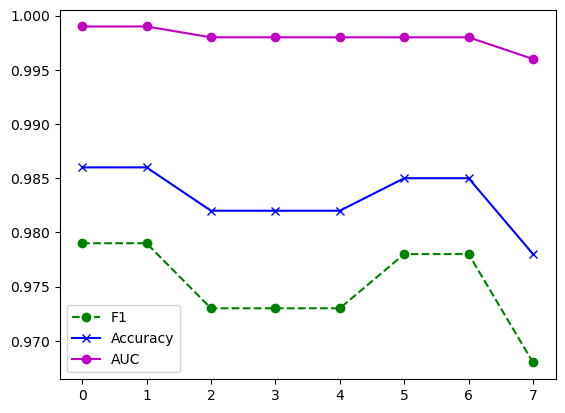

In [72]:
import matplotlib.pyplot as plt
plt.plot([i[1] for i in result_table[1:]], 'go--', label='F1')
plt.plot([i[2] for i in result_table[1:]], 'bx-', label='Accuracy')
plt.plot([i[3] for i in result_table[1:]], 'mo-', label='AUC')
plt.legend()
plt.savefig('MLP Comparisons.jpg')
plt.show()

In [71]:
plt.savefig('MLP Comparisons.jpg')

<Figure size 640x480 with 0 Axes>